# Topic : Time Series Forecasting with Python : Monthy Beer Production with ARIMA Model ....

In [1]:
import pandas as pd # Help to read csv files from directory and import data into rows and columns...
import matplotlib.pyplot as plt # It help for visulization of the data 
import numpy as np  ## With the help to NUMPY , we can run  numerical and mathematically concept ...


In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\DESKTOP NEW\CSV FILE\monthly-beer-production-in-austr.csv')
df

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [3]:
df.head()  # with the help of head() ,we can import the data of above 5 rows ....

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.shape # with the help of shape function we can visulize the number of rows and columns .

(476, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

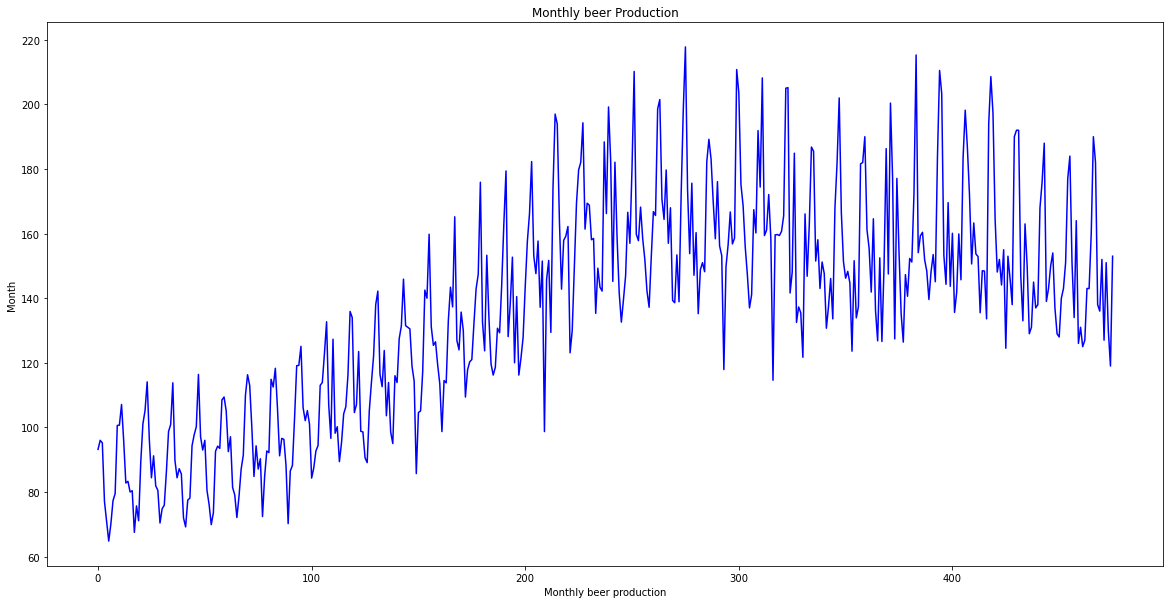

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel('Monthly beer production')
plt.ylabel('Month')
plt.title('Monthly beer Production')
plt.plot(df['Monthly beer production'], color='blue')
plt.show

# For checking stationarity of data ......

In [6]:
import statsmodels.api as sm

In [7]:
from statsmodels.tsa.stattools import adfuller # using ADF test function .....

In [8]:
adfuller(df['Monthly beer production'])

(-2.282661418787576,
 0.17762099829132544,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [ ]:
Now , I am Converted data into stationarity by using log function 

#  Convert Non Stationarity into Stationarity ,.......

In [9]:
df_log=np.sqrt(df['Monthly beer production'])
df_diff=df_log.diff().dropna()

In [10]:
result=adfuller (df_diff)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -4.903197
p-value: 0.000034
Critical values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


<function matplotlib.pyplot.show(close=None, block=None)>

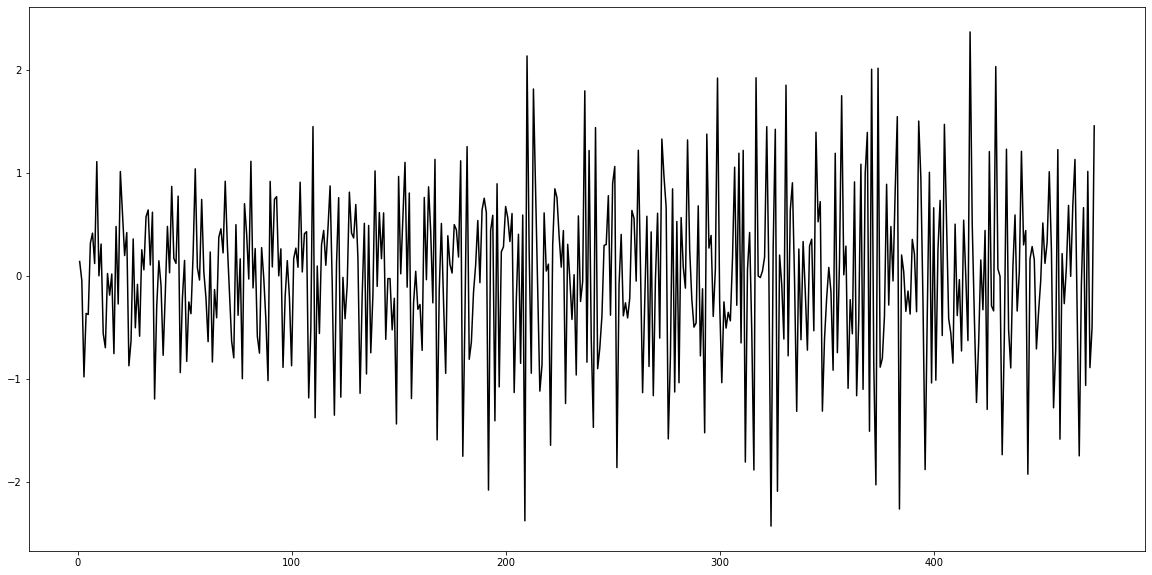

In [11]:
plt.figure(figsize = (20,10))
plt.plot(df_diff, color='black')
plt.show

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

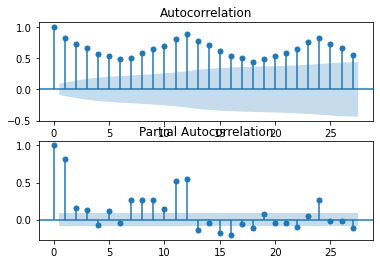

In [21]:
plt.subplot(211)
plot_acf(df['Monthly beer production'].iloc[12:], ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Monthly beer production'].iloc[12:], ax=plt.gca())
plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA  

In [26]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(476, 2)
(446, 2) (30, 2)


# So here i used train test as 30% and test as 70%

In [18]:
model=ARIMA(train['Monthly beer production'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     Monthly beer production   No. Observations:                  446
Model:                          ARMA(1, 5)   Log Likelihood               -1880.595
Method:                            css-mle   S.D. of innovations             16.278
Date:                     Mon, 29 Aug 2022   AIC                           3777.190
Time:                             14:32:37   BIC                           3809.992
Sample:                                  0   HQIC                          3790.123
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           121.3919     26.691      4.548      0.000      69.078     173.706
ar.L1.Monthly beer production     0.9972      0.003    358.478      0.000       0.992       1.003
ma.L1.Monthly beer production    -0.5824      0.037    -15.689      0.000      -0.655      -0.510
ma.L2.Monthly beer production    -0.4475      0.043    -10.341      0.000      -0.532      -0.363
ma.L3.Monthly beer production    -0.3329      0.054     -6.159      0.000      -0.439      -0.227
ma.L4.Monthly beer production    -0.0839      0.039     -2.132      0.033      -0.161      -0.007
ma.L5.Monthly beer production     0.6006      0.039     15.504      0.000       0.525       0.677
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0028           +0.0000j            1.0028            0.0000
MA.1           -1.1933           -0.0000j            1.1933           -0.5000
MA.2           -0.3354           -1.1071j            1.1568           -0.2968
MA.3           -0.3354           +1.1071j            1.1568            0.2968
MA.4            1.0019           -0.1970j            1.0211           -0.0309
MA.5            1.0019           +0.1970j            1.0211            0.0309
-----------------------------------------------------------------------------
"""

In [26]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
#pred.index=df.index[start=end+1]
#print(pred)

446    144.287519
447    140.447978
448    145.265139
449    135.498553
450    145.118631
451    145.051739
452    144.985036
453    144.918520
454    144.852192
455    144.786051
456    144.720097
457    144.654328
458    144.588745
459    144.523347
460    144.458133
461    144.393103
462    144.328256
463    144.263592
464    144.199110
465    144.134811
466    144.070692
467    144.006754
468    143.942997
469    143.879419
470    143.816021
471    143.752801
472    143.689759
473    143.626896
474    143.564209
475    143.501699
dtype: float64


<AxesSubplot:>

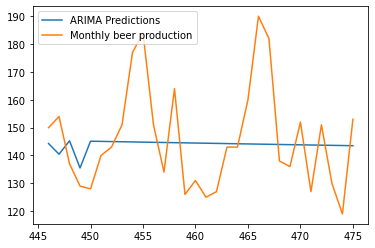

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['Monthly beer production'].plot(legend=True)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Monthly beer production'].mean()
rmse=sqrt(mean_squared_error(pred,test['Monthly beer production']))
print(rmse)

18.415031498736624


<AxesSubplot:>

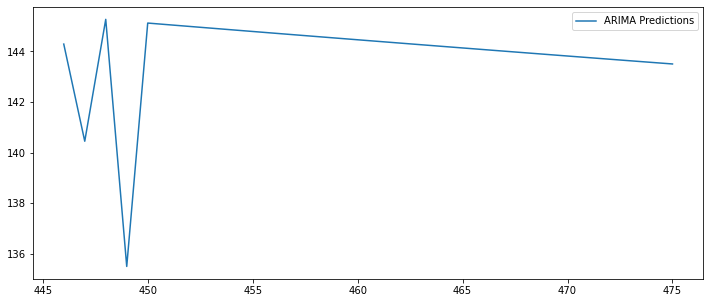

In [22]:
pred.plot(figsize=(12,5),legend=True)